## 1

In [57]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flight_df = pd.read_excel('flight_price.xlsx')

In [4]:
print(f'rows and columns : {flight_df.shape[0]}, {flight_df.shape[1]} respectively')

rows and columns : 10683, 11 respectively


## 2

<AxesSubplot: xlabel='Price', ylabel='Count'>

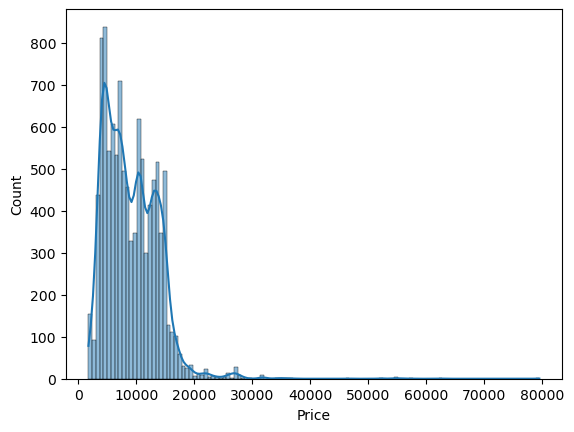

In [10]:
sns.histplot(data=flight_df.Price, kde=True)

In [ ]:
# seems like a rigt skewed distribution

## 3 

In [13]:
flight_df.Price.max(), flight_df.Price.min()

(79512, 1759)

In [14]:
range_ = flight_df.Price.max() - flight_df.Price.min()   # range = max - min
range_

77753

## 4

In [ ]:
# range of price by airline

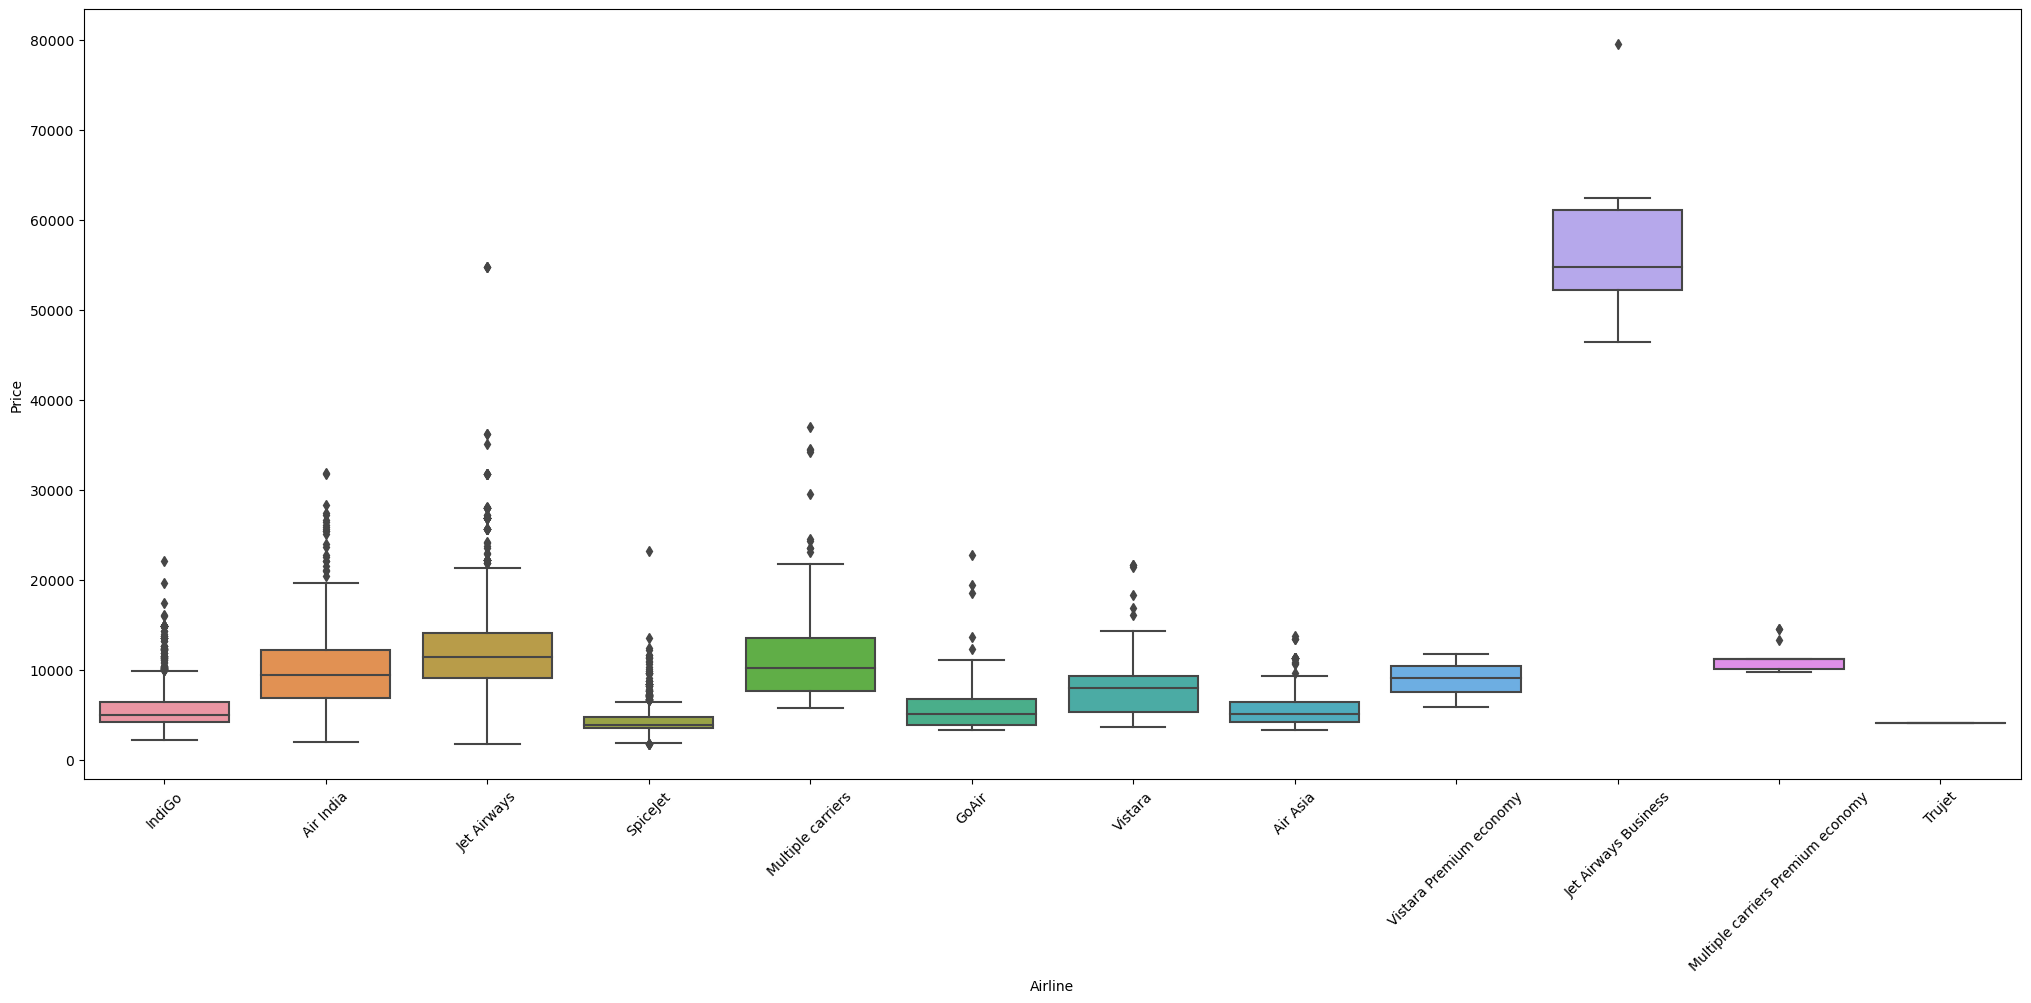

In [30]:
plt.figure(figsize=(25,10))
sns.boxplot(x=flight_df.Airline ,y=flight_df.Price)
plt.xticks(rotation=45)
plt.show()

## 5

In [25]:
''' there are many outliers in the price frature as visible in the boxplot above '''

' there are many outliers in the price frature as visible in the boxplot above '

## 6

In [46]:
flight_df['month_of_Journey']=pd.to_datetime(flight_df['Date_of_Journey'],dayfirst=True).dt.strftime('%B')

<AxesSubplot: xlabel='month_of_Journey', ylabel='Count'>

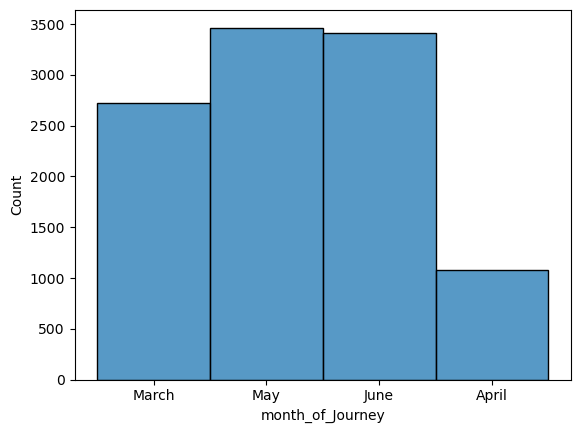

In [52]:
sns.histplot(data=flight_df.month_of_Journey)

In [53]:
# most trips were made during the summer holiday season of months May and June

## 7

## flight price by airline and month

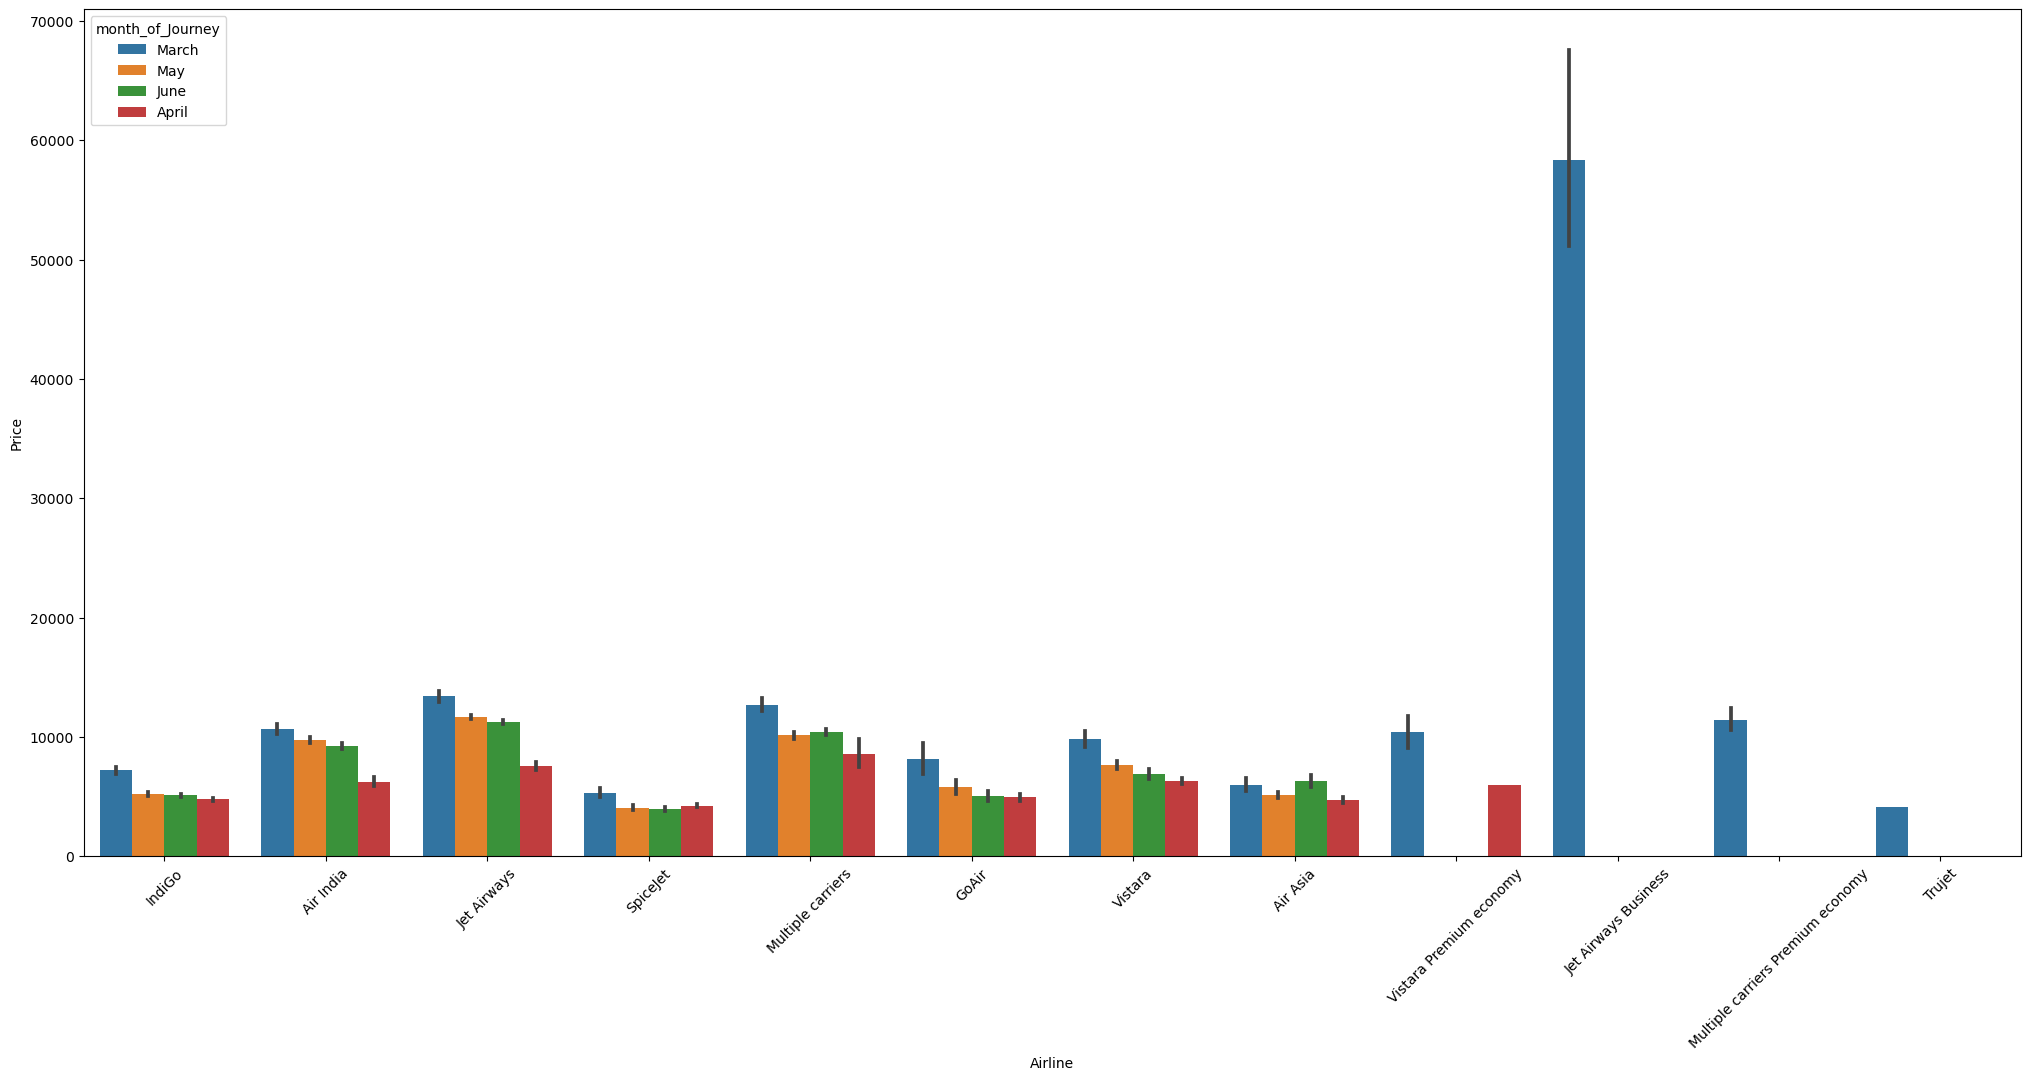

In [70]:
plt.figure(figsize=(25,11))
sns.barplot(x=flight_df.Airline ,y=flight_df.Price, hue=flight_df.month_of_Journey)
plt.xticks(rotation=45)
plt.show()

## 8

In [ ]:
'''
Some of the features I would analyze include:

Departure and Arrival Cities: The location of the departure and arrival cities can impact the cost of flights. Certain destinations may have higher demand, which could lead to higher prices.

Time of Year: The time of year can also have a significant impact on flight prices. High travel seasons such as holidays or summer vacation periods tend to have higher prices.

Airline Carrier: The airline carrier can also impact flight prices. Some carriers may have higher prices due to their brand reputation or better amenities.

Flight Duration: Longer flights generally cost more than shorter flights.

Number of Stops: Flights with multiple stops or layovers can be cheaper than non-stop flights.

Time of Day: Flights during peak travel hours can be more expensive than flights during off-peak hours.
'''

## playstore dataset

## 9

In [20]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
df.shape

(10841, 13)

## 10

In [22]:
df[df.Rating==df.Rating.max()].index[0]

10472

In [23]:
df.drop(10472, axis=0, inplace=True)

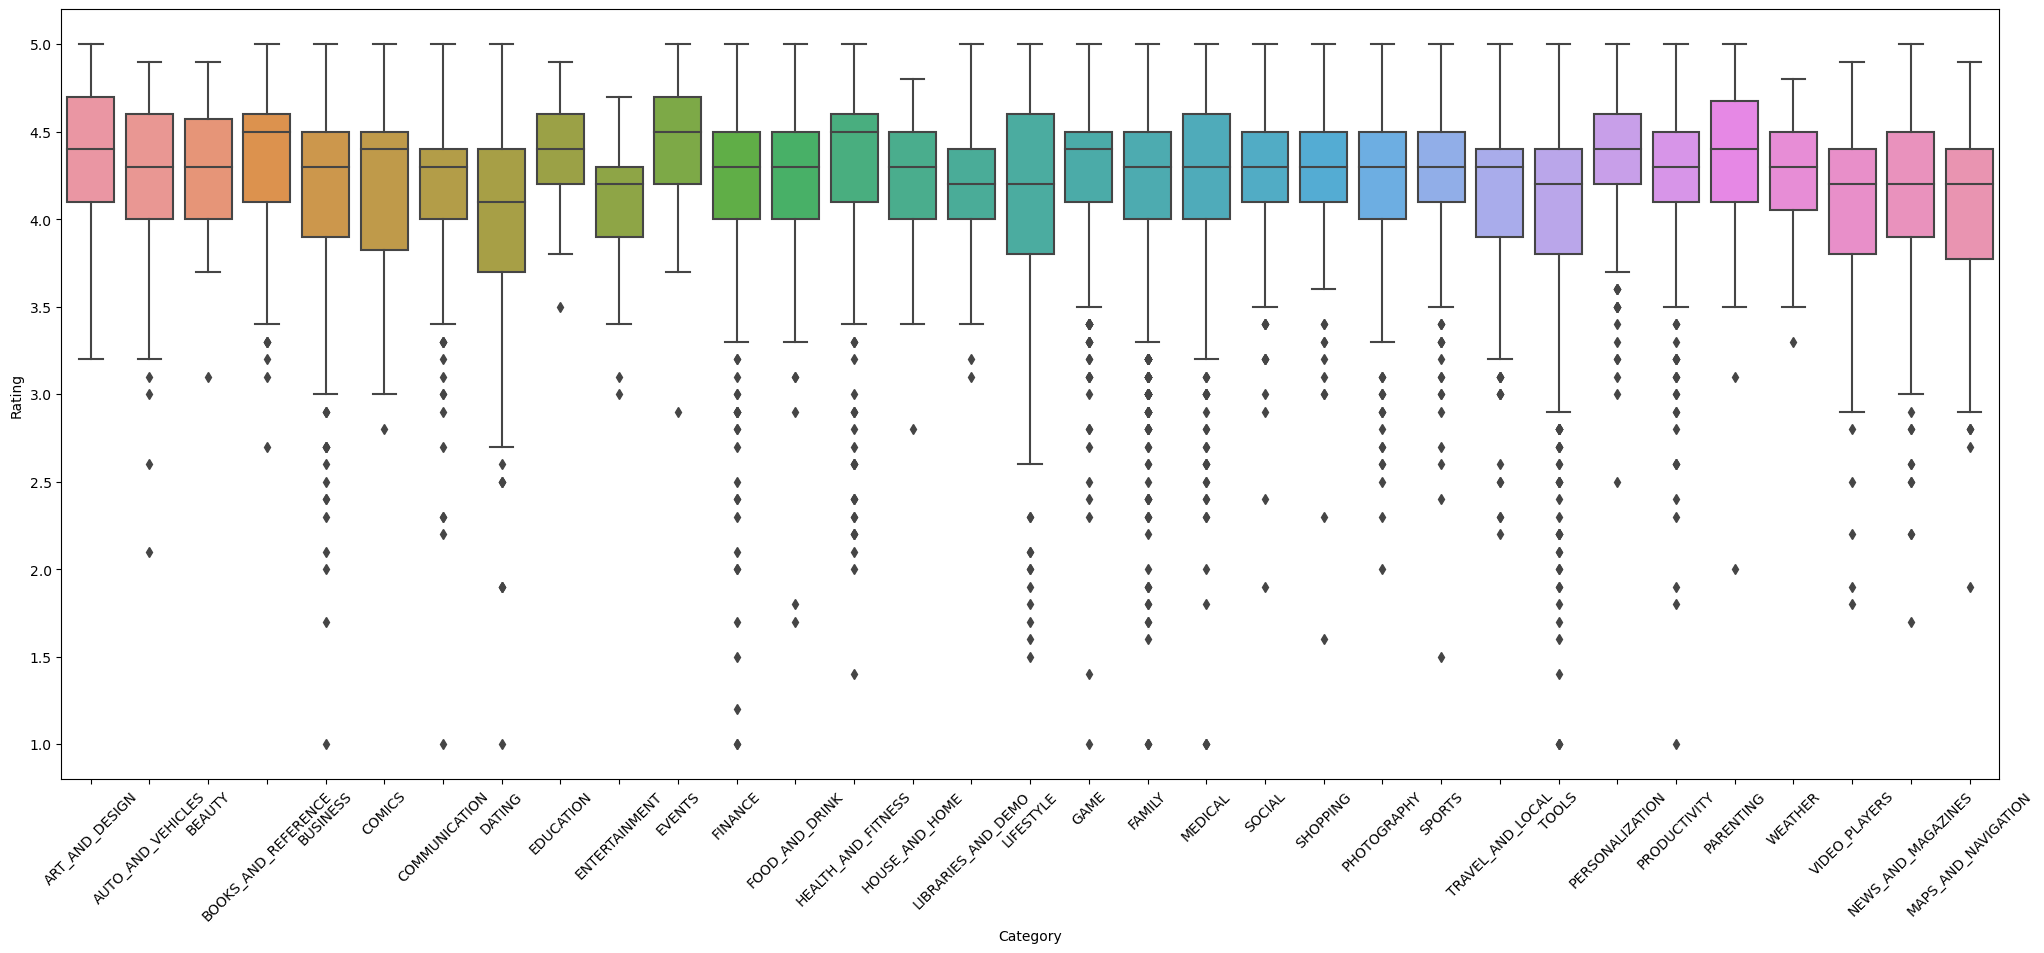

In [24]:
plt.figure(figsize=(25,10))
sns.boxplot(x=df.Category, y=df.Rating)
plt.xticks(rotation=45)
plt.show()

## 11

In [25]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
''' reviews : we can use fill_na with 0 as inputtion to fill missing values in 
              in review feature with 0's
    type : we can use mode inputation and fill it with whatever occurs the more , 
           free or paid
    current version : also use mode inputation , we assume those 8 misssingg versions to be 
                      replaces with the version most apps are on play store
    android verrsion : same method use as current version
'''

## 4

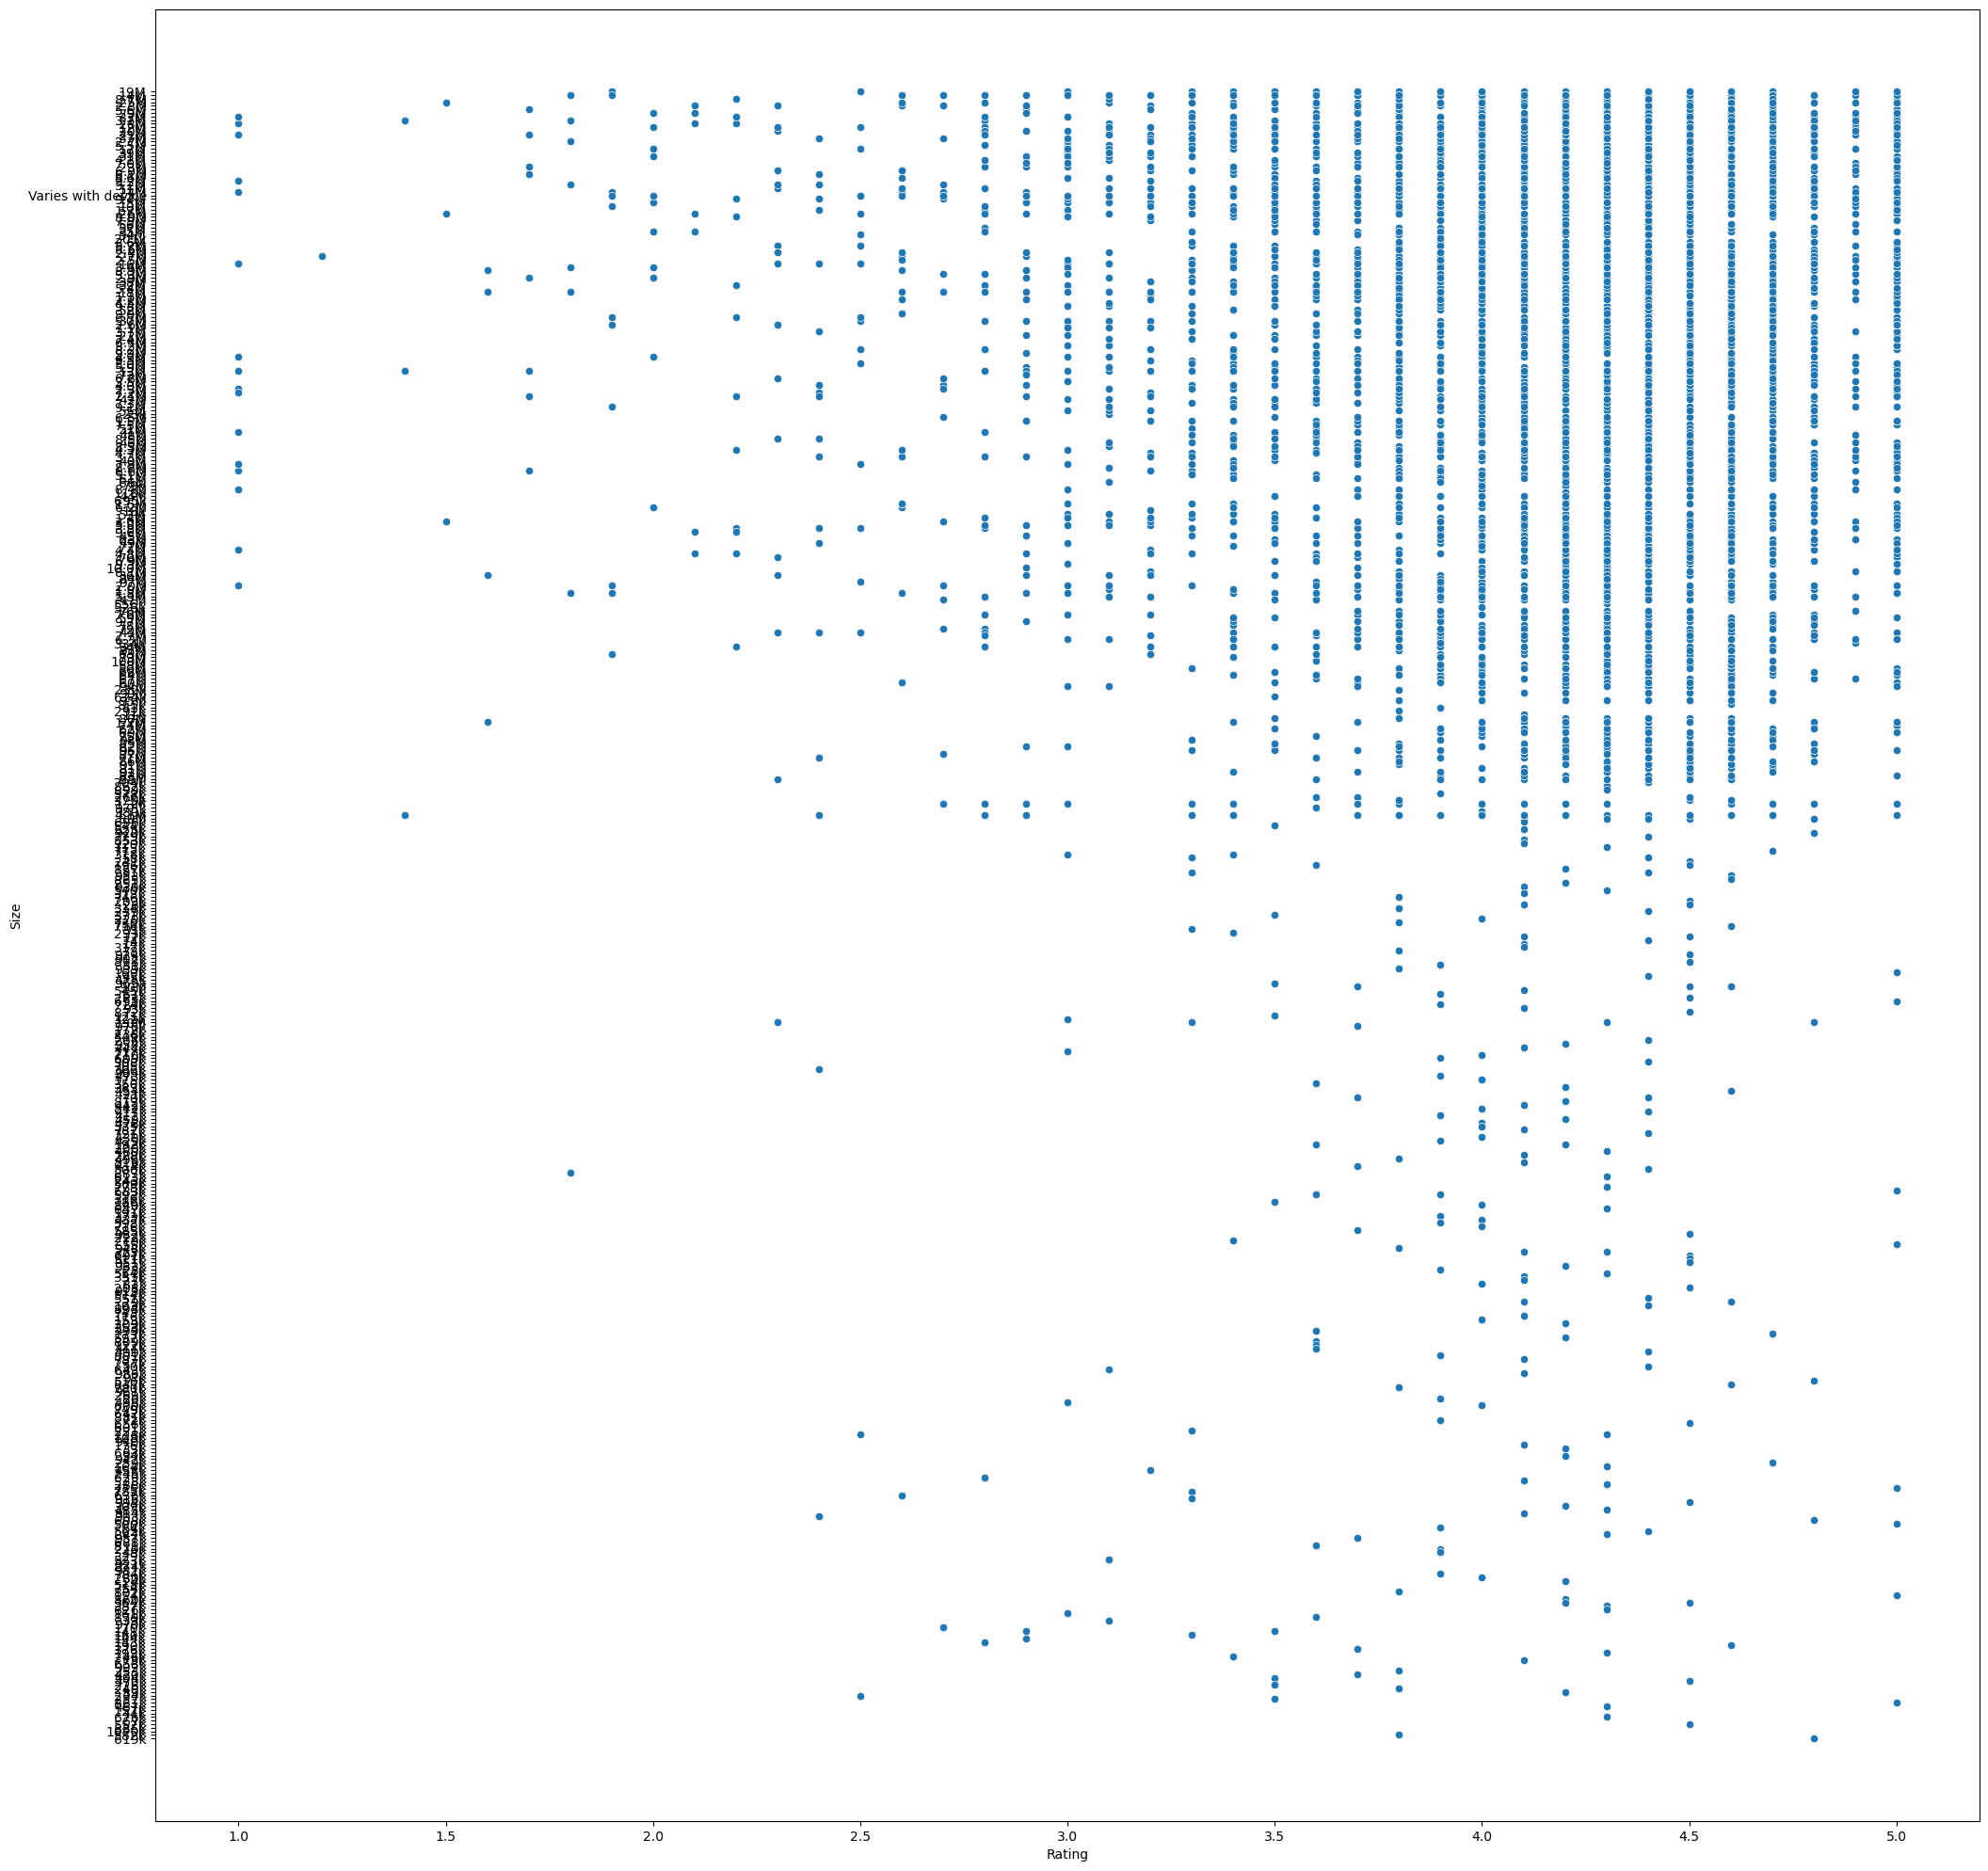

In [34]:
plt.figure(figsize=(25,25))
sns.scatterplot(x=df.Rating, y=df.Size)
plt.show()

In [ ]:
# not a good situation to use scatterplot for

## 5

In [35]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [52]:
df['Price'] = df.Price.str.replace('$','').astype(float)

AttributeError: Can only use .str accessor with string values!

In [95]:
category_price_fredf.groupby(['Category'])['Price'].mean()

Category
ART_AND_DESIGN         0.091846
AUTO_AND_VEHICLES      0.158471
BEAUTY                 0.000000
BOOKS_AND_REFERENCE    0.520739
BUSINESS               0.410515
COMICS                 0.000000
COMMUNICATION          0.227158
DATING                 0.160357
EDUCATION              0.138154
ENTERTAINMENT          0.071892
EVENTS                 1.718594
FAMILY                 1.245919
FINANCE                8.057861
FOOD_AND_DRINK         0.068387
GAME                   0.256289
HEALTH_AND_FITNESS     0.210294
HOUSE_AND_HOME         0.000000
LIBRARIES_AND_DEMO     0.011647
LIFESTYLE              6.329410
MAPS_AND_NAVIGATION    0.196715
MEDICAL                2.501691
NEWS_AND_MAGAZINES     0.015076
PARENTING              0.159667
PERSONALIZATION        0.390387
PHOTOGRAPHY            0.379596
PRODUCTIVITY           0.616536
SHOPPING               0.024464
SOCIAL                 0.057036
SPORTS                 0.284900
TOOLS                  0.317023
TRAVEL_AND_LOCAL       0.210759

<AxesSubplot: xlabel='Category', ylabel='Price'>

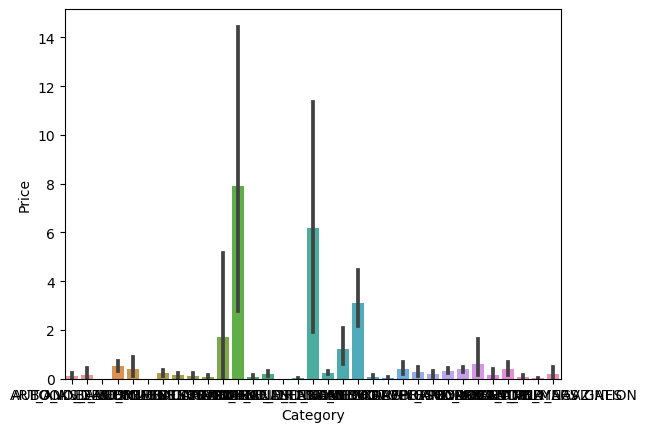

In [54]:
sns.barplot(x=df.Category, y=df.Price)

## 14

In [59]:
df.drop_duplicates(inplace=True)

In [64]:
df.Installs = df.Installs.str.replace('+','')
df.Installs = df.Installs.str.replace(',','').astype(int)

/tmp/ipykernel_70/3702311074.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Installs = df.Installs.str.replace('+','')


In [86]:
freq=df.groupby(['App'])['Installs'].sum().reset_index()

In [89]:
frequency_table = freq.sort_values(by=['Installs'], ascending=False)

In [90]:
frequency_table[0:10]        # frequency table of top 10 most downloaded apps

,App,Installs
8079,Subway Surfers,5000000000
4937,Google Photos,4000000000
5118,Hangouts,4000000000
4933,Google News,3000000000
4921,Google Chrome: Fast & Secure,3000000000
4924,Google Drive,3000000000
6050,Maps - Navigate & Explore,3000000000
5399,Instagram,3000000000
2364,Candy Crush Saga,2500000000
8303,Temple Run 2,2500000000


## 15